# HW2

In [65]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

%matplotlib inline

In [66]:
gpa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/gpa.csv")

# 1

In [67]:
gpa.columns = ['Index', 'GPA', 'ParentsIncome', 'SATMath', 'SATReading', 'SATWriting', 'PeanutAllergy']


In [68]:
gpa.head()

,Index,GPA,ParentsIncome,SATMath,SATReading,SATWriting,PeanutAllergy
0,1,3.03,48555.69,510,527,571,0
1,2,3.55,48779.43,623,593,639,0
2,3,3.83,49708.23,485,592,623,0
3,4,2.63,52874.02,648,689,738,0
4,5,3.60,51052.65,653,476,720,0


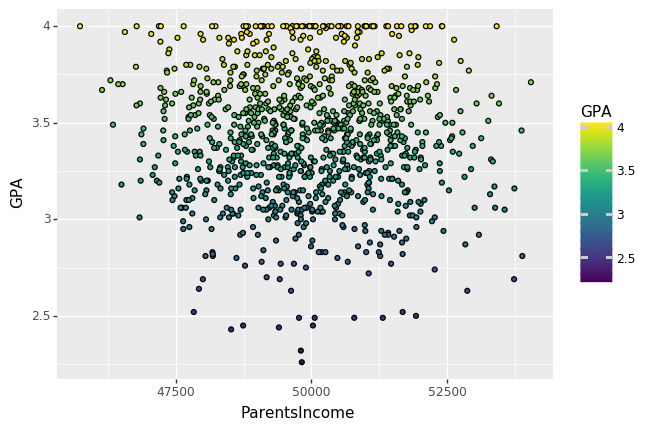

<ggplot: (317278481)>

In [69]:
(ggplot(gpa, aes('ParentsIncome', 'GPA', fill = 'GPA'))+
    geom_point())

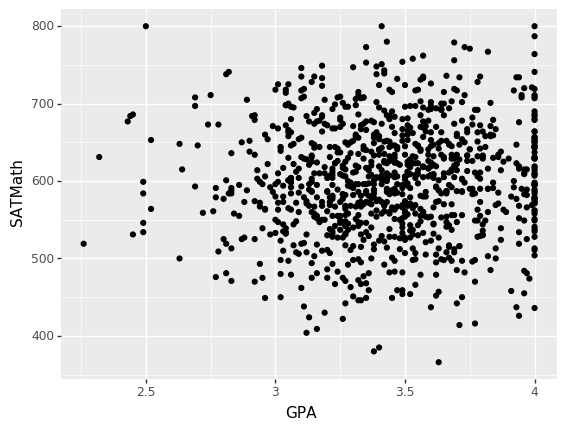

<ggplot: (317278565)>

In [70]:
(ggplot(gpa, aes('GPA', 'SATMath'))+
    geom_point())

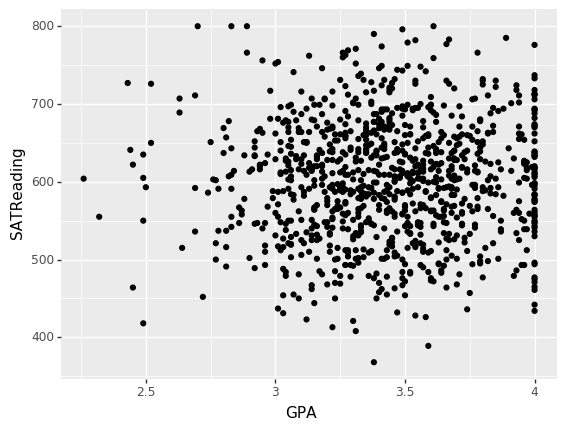

<ggplot: (316514089)>

In [90]:
(ggplot(gpa, aes('GPA', 'SATReading'))+
    geom_point())

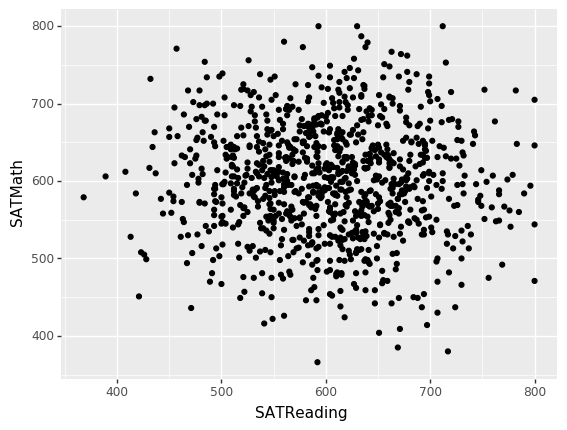

<ggplot: (316334169)>

In [91]:
(ggplot(gpa, aes('SATReading', 'SATMath'))+
    geom_point())

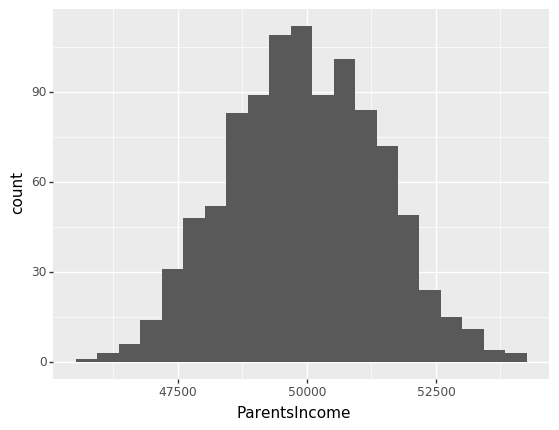

<ggplot: (317283793)>

In [71]:
(ggplot(gpa, aes('ParentsIncome'))+
    geom_histogram())

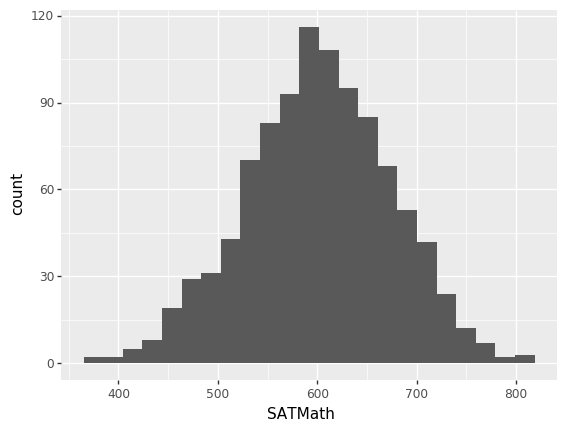

<ggplot: (317214701)>

In [72]:
(ggplot(gpa, aes('SATMath'))+
    geom_histogram())

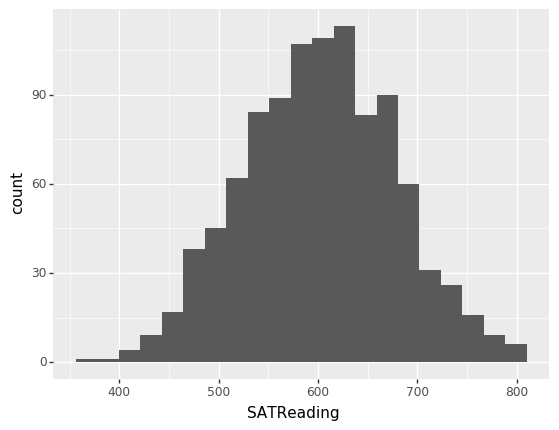

<ggplot: (316513945)>

In [88]:
(ggplot(gpa, aes('SATReading'))+
    geom_histogram())

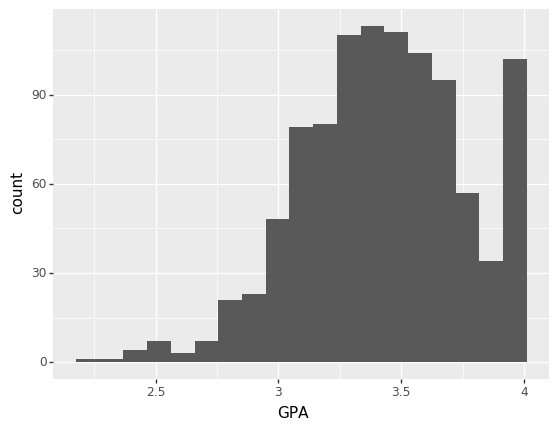

<ggplot: (317322221)>

In [73]:
(ggplot(gpa, aes('GPA'))+
    geom_histogram())

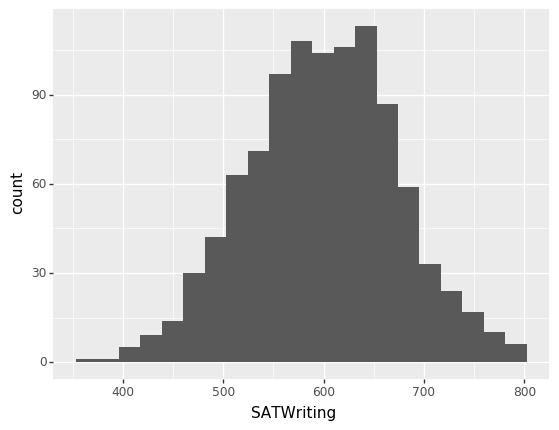

<ggplot: (317279873)>

In [89]:
(ggplot(gpa, aes('SATWriting'))+
    geom_histogram())

In [74]:
# I do not see a clear correlation between variables. 
# However I do see a normal distribution for 'ParentsIncome' and 'SATMath'.
# Also I noticed that there are alot more students with 4.0 GPA's than I though there would be

# 2

In [81]:
predictors = ["SATMath", "SATReading", "SATWriting"]

In [82]:
X = gpa[predictors]
Y = gpa['GPA']

In [83]:
zScoregpa = StandardScaler()
zScoregpa.fit(X)
Xz = zScoregpa.transform(X)

In [84]:
gpa_mod = LinearRegression()
gpa_mod.fit(Xz,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# I decided to use "SATMath", "SATReading", and "SATWriting" as my variables because thought those would be a great 
# reflection of a student's GPA. Although I know that's not always the case. 

# 3

In [85]:
gpa_pred = gpa_mod.predict(Xz)
mean_squared_error(Y, gpa_pred)

0.10957668599193562

In [86]:
r2_score(Y, gpa_pred)

0.0028687627896210044

In [ ]:
# My model produced a mean-squared-error of about 0.11 
# and an R^2 value of about 0.0029.

# This shows shows that my model is very biased and unable to accurately perdict future values

# 4

In [93]:
coefficients = pd.DataFrame({"Coef":gpa_mod.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": gpa_mod.intercept_,
                    "Name": "intercept"}, ignore_index = True)

coefficients

,Coef,Name
0,0.016321,SATMath
1,0.007353,SATReading
2,-0.001782,SATWriting
3,3.431990,intercept


In [ ]:
# this shows that my three variables have little to no affect on the GPA which is surprising because
# I thought if a student had high SAT scores, a similar performance would be seen in their GPA. Obviously I was wrong

# for 1 unit increase in SATMATH, there is a 0.016 increase in GPA
# for 1 unit increase in SATReading, there is a 0.0074 increase in GPA
# for 1 unit increase in SATWriting, there is a -0.0017 decrease in GPA